H_0: Male and Female have same average count on Article

H_1: Male and Female have different average count on Article

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [3]:
ls ./data_important

faculties_gender_race.csv       gender_year.csv
faculties_gender_race_year.csv  professor_id.csv
faculties_with_gender.csv


In [4]:
df = pd.read_csv("./data_important/faculties_gender_race.csv")
print(df.shape)
df.head(2)

(749, 13)


,Id,Name,LastName,FirstName,Gender,RankName,Department,TotalArticleCount,TotalConfProcCount,TotalGrantCount,TotalPatentCount,TotalCourseCount,Race
0,1485,"BALAKRISHNAN, HAMSA",BALAKRISHNAN,HAMSA,Male,Professor,Aeronautics and Astronautics,46,63,15,1,2,PCTAPI
1,2030,"BARRETT, STEVEN R. H",BARRETT,STEVEN,Male,Associate,Aeronautics and Astronautics,87,7,11,1,2,PCTWHITE


# Article by Gender

In [5]:
df_article = df[['Id', 'Name', 'Gender', 'TotalArticleCount']].drop_duplicates()
print(df_article.shape)
df_article.head(2)

(692, 4)


,Id,Name,Gender,TotalArticleCount
0,1485,"BALAKRISHNAN, HAMSA",Male,46
1,2030,"BARRETT, STEVEN R. H",Male,87


(367, 4)


Text(0.5, 1.0, 'Distribution of Male Faculty on TotalArticleCount')

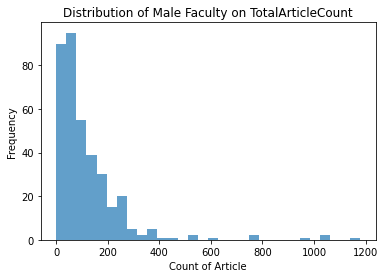

In [72]:
df_tmale = df_article[df_article.Gender == 'Male']
print(df_tmale.shape)
tmale = np.array(df_tmale.TotalArticleCount)

plt.hist(tmale, bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Article")
plt.ylabel("Frequency")
plt.title("Distribution of Male Faculty on TotalArticleCount")


Text(0.5, 1.0, 'Square Root Transformed Distribution of Male Faculty on Article Count')

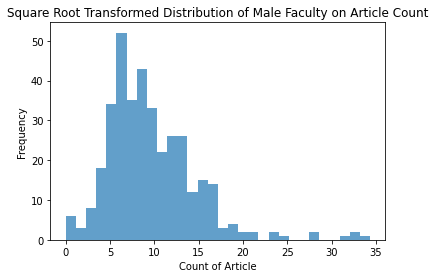

In [75]:
plt.hist(np.sqrt(tmale), bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Article")
plt.ylabel("Frequency")
plt.title("Square Root Transformed Distribution of Male Faculty on Article Count")

(325, 4)


Text(0.5, 1.0, 'Distribution of Female Faculty on TotalArticleCount')

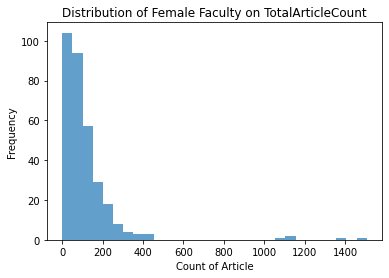

In [7]:
df_tfemale = df_article[df_article.Gender == 'Female']
print(df_tfemale.shape)
tfemale = np.array(df_tfemale.TotalArticleCount)
plt.hist(tfemale, bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Article")
plt.ylabel("Frequency")
plt.title("Distribution of Female Faculty on TotalArticleCount")

(325, 4)


Text(0.5, 1.0, 'Square Root Transformed Distribution of Female Faculty on Article Count')

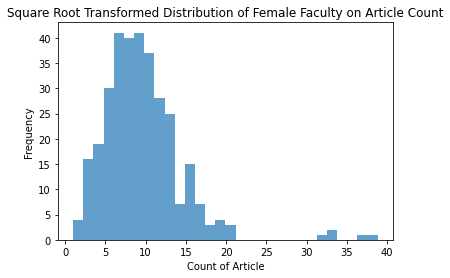

In [76]:
df_tfemale = df_article[df_article.Gender == 'Female']
print(df_tfemale.shape)
tfemale = np.array(df_tfemale.TotalArticleCount)
plt.hist(np.sqrt(tfemale), bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Article")
plt.ylabel("Frequency")
plt.title("Square Root Transformed Distribution of Female Faculty on Article Count")

In [77]:
stats.levene(tmale, tfemale),stats.levene(np.sqrt(tmale), np.sqrt(tfemale))

(LeveneResult(statistic=0.10812154531697046, pvalue=0.7423927210549519),
 LeveneResult(statistic=0.6103017437080361, pvalue=0.43494217181612294))

Since we have pvalue > 0.05, we believe the two samples have equal variances.

In [78]:
stats.ttest_ind(tmale, tfemale, equal_var = True),stats.ttest_ind(np.sqrt(tmale), np.sqrt(tfemale), equal_var = True)

(Ttest_indResult(statistic=0.18117063656896693, pvalue=0.8562868448619722),
 Ttest_indResult(statistic=0.24043537165969942, pvalue=0.8100641766217664))

In [10]:
np.mean(tmale), np.mean(tfemale)

(119.4550408719346, 117.32923076923078)

# Conference by Gender

In [84]:
df_conf = df[['Id', 'Name', 'Gender', 'TotalConfProcCount']].drop_duplicates()
print(df_conf.shape)
df_conf.head(2)

(692, 4)


,Id,Name,Gender,TotalConfProcCount
0,1485,"BALAKRISHNAN, HAMSA",Male,63
1,2030,"BARRETT, STEVEN R. H",Male,7


(367, 4)


Text(0.5, 1.0, 'Distribution of Male Faculty on TotalConfProcCount')

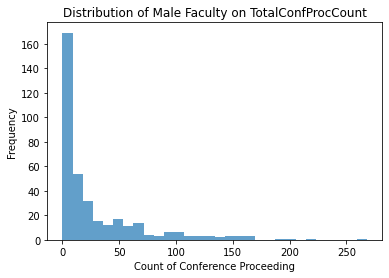

In [116]:
df_tmale = df_conf[df_conf.Gender == 'Male']
print(df_tmale.shape)
tmale = np.array(df_tmale.TotalConfProcCount)
plt.hist(tmale, bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Conference Proceeding")
plt.ylabel("Frequency")
plt.title("Distribution of Male Faculty on TotalConfProcCount")

Text(0.5, 1.0, 'Square Root Transformed Distribution of Male Faculty on TotalConfProcCount')

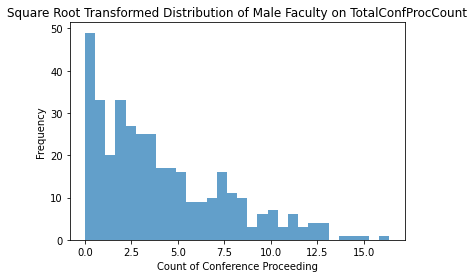

In [117]:
plt.hist(np.sqrt(tmale), bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Conference Proceeding")
plt.ylabel("Frequency")
plt.title("Square Root Transformed Distribution of Male Faculty on TotalConfProcCount")

(325, 4)


Text(0.5, 1.0, 'Distribution of Female Faculty on TotalConfProcCount')

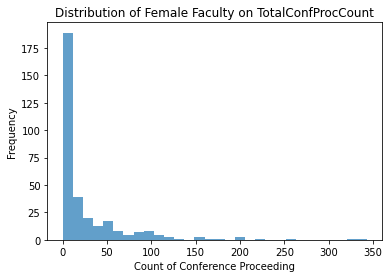

In [103]:
df_tfemale = df_conf[df_conf.Gender == 'Female']
print(df_tfemale.shape)
tfemale = np.array(df_tfemale.TotalConfProcCount)
plt.hist(tfemale, bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Conference Proceeding")
plt.ylabel("Frequency")
plt.title("Distribution of Female Faculty on TotalConfProcCount")

Text(0.5, 1.0, 'Square Root Transformed Distribution of Female Faculty on TotalConfProcCount')

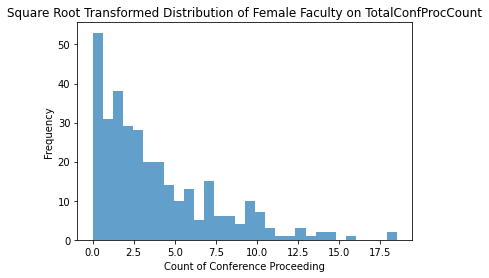

In [104]:
plt.hist(np.sqrt(tfemale), bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Conference Proceeding")
plt.ylabel("Frequency")
plt.title("Square Root Transformed Distribution of Female Faculty on TotalConfProcCount")

In [82]:
stats.levene(tmale, tfemale),stats.levene(np.sqrt(tmale), np.sqrt(tfemale))

(LeveneResult(statistic=0.10812154531697046, pvalue=0.7423927210549519),
 LeveneResult(statistic=0.6103017437080361, pvalue=0.43494217181612294))

Since we have pvalue > 0.05, we believe the two samples have equal variances.

In [83]:
stats.ttest_ind(tmale, tfemale, equal_var = True),stats.ttest_ind(np.sqrt(tmale), np.sqrt(tfemale), equal_var = True)

(Ttest_indResult(statistic=0.18117063656896693, pvalue=0.8562868448619722),
 Ttest_indResult(statistic=0.24043537165969942, pvalue=0.8100641766217664))

In [16]:
np.mean(tmale), np.mean(tfemale)

(28.70299727520436, 27.02769230769231)

# Grant by Gender

In [123]:
df_grant = df[['Id', 'Name', 'Gender', 'TotalGrantCount']].drop_duplicates()
print(df_grant.shape)
df_grant.head(2)

(692, 4)


,Id,Name,Gender,TotalGrantCount
0,1485,"BALAKRISHNAN, HAMSA",Male,15
1,2030,"BARRETT, STEVEN R. H",Male,11


(367, 4)


Text(0.5, 1.0, 'Distribution of Male Faculty on TotalGrantCount')

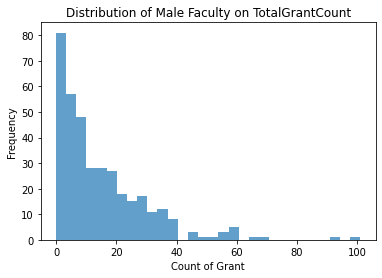

In [124]:
df_tmale = df_grant[df_grant.Gender == 'Male']
print(df_tmale.shape)
tmale = np.array(df_tmale.TotalGrantCount)
plt.hist(tmale, bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Grant")
plt.ylabel("Frequency")
plt.title("Distribution of Male Faculty on TotalGrantCount")

Text(0.5, 1.0, 'Square Root Transformed Distribution of Male Faculty on TotalGrantCount')

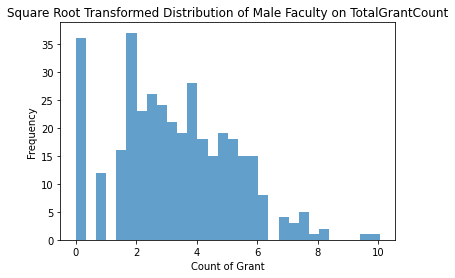

In [125]:
plt.hist(np.sqrt(tmale), bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Grant")
plt.ylabel("Frequency")
plt.title("Square Root Transformed Distribution of Male Faculty on TotalGrantCount")

(325, 4)


Text(0.5, 1.0, 'Distribution of Female Faculty on TotalGrantCount')

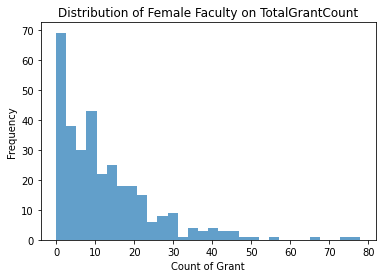

In [126]:
df_tfemale = df_grant[df_grant.Gender == 'Female']
print(df_tfemale.shape)
tfemale = np.array(df_tfemale.TotalGrantCount)
plt.hist(tfemale, bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Grant")
plt.ylabel("Frequency")
plt.title("Distribution of Female Faculty on TotalGrantCount")

Text(0.5, 1.0, 'Square Root Transformed Distribution of Female Faculty on TotalGrantCount')

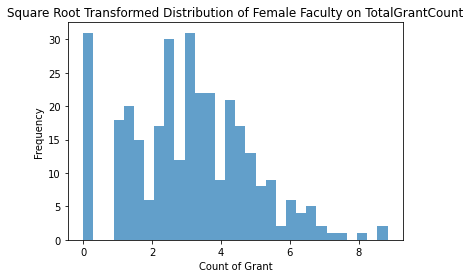

In [127]:
plt.hist(np.sqrt(tfemale), bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Grant")
plt.ylabel("Frequency")
plt.title("Square Root Transformed Distribution of Female Faculty on TotalGrantCount")

In [128]:
stats.levene(tmale, tfemale),stats.levene(np.sqrt(tmale), np.sqrt(tfemale))

(LeveneResult(statistic=5.005536815173139, pvalue=0.025584874938834008),
 LeveneResult(statistic=3.385802756223844, pvalue=0.06618947721026375))

Since we have pvalue < 0.05, we believe the two samples do not have equal variances.

In [130]:
stats.ttest_ind(tmale, tfemale, equal_var = False),stats.ttest_ind(np.sqrt(tmale), np.sqrt(tfemale), equal_var = True)

(Ttest_indResult(statistic=1.9857549647424195, pvalue=0.04745675316793936),
 Ttest_indResult(statistic=1.6201188230486179, pvalue=0.10566365547781693))

In [131]:
np.mean(tmale),np.mean(tfemale)

(14.69482288828338, 12.624615384615385)

# Patent by Gender

In [133]:
df_patent = df[['Id', 'Name', 'Gender', 'TotalPatentCount']].drop_duplicates()
print(df_patent.shape)
df_patent.head(2)

(692, 4)


,Id,Name,Gender,TotalPatentCount
0,1485,"BALAKRISHNAN, HAMSA",Male,1
1,2030,"BARRETT, STEVEN R. H",Male,1


(367, 4)


Text(0.5, 1.0, 'Distribution of Male Faculty on TotalPatentCount')

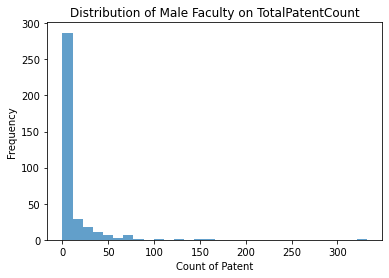

In [134]:
df_tmale = df_patent[df_patent.Gender == 'Male']
print(df_tmale.shape)
tmale = np.array(df_tmale.TotalPatentCount)
plt.hist(tmale, bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Patent")
plt.ylabel("Frequency")
plt.title("Distribution of Male Faculty on TotalPatentCount")

(325, 4)


Text(0.5, 1.0, 'Distribution of Female Faculty on TotalPatentCount')

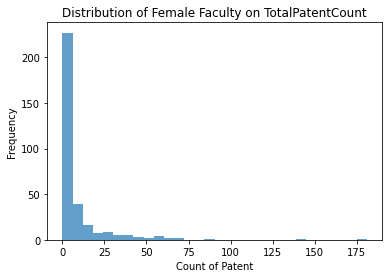

In [24]:
df_tfemale = df_patent[df_patent.Gender == 'Female']
print(df_tfemale.shape)
tfemale = np.array(df_tfemale.TotalPatentCount)
plt.hist(tfemale, bins=30, density=False, stacked=True, alpha=0.7)
plt.xlabel("Count of Patent")
plt.ylabel("Frequency")
plt.title("Distribution of Female Faculty on TotalPatentCount")

In [25]:
stats.levene(tmale, tfemale)

LeveneResult(statistic=1.8008123967892433, pvalue=0.18005572579593374)

Since we have pvalue > 0.05, we believe the two samples have equal variances.

In [26]:
stats.ttest_ind(tmale, tfemale, equal_var = True)

Ttest_indResult(statistic=1.4296964029605437, pvalue=0.1532567817622131)

In [27]:
np.mean(tmale), np.mean(tfemale)

(11.021798365122615, 8.504615384615384)

# Article by Race

In [140]:
dfr_article = df[['Id', 'Name', 'Race', 'TotalArticleCount']].drop_duplicates()
dfr_article.Race.unique()

array(['PCTAPI', 'PCTWHITE', 'PCTHISPANIC', 'PCTBLACK'], dtype=object)

Text(0.5, 1.0, 'Square Root Transformed Box Plot of Article Count by Race')

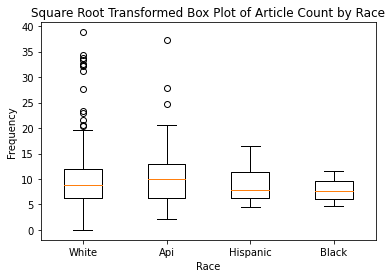

In [173]:
(r1, r2, r3, r4) = (dfr_article[dfr_article.Race == 'PCTWHITE'].TotalArticleCount,
                    dfr_article[dfr_article.Race == 'PCTAPI'].TotalArticleCount,
                    dfr_article[dfr_article.Race == 'PCTHISPANIC'].TotalArticleCount,
                    dfr_article[dfr_article.Race == 'PCTBLACK'].TotalArticleCount)
sqr1, sqr2, sqr3, sqr4 = np.sqrt(r1), np.sqrt(r2),np.sqrt(r3),np.sqrt(r4)
fig, ax = plt.subplots()
ax.boxplot([sqr1, sqr2, sqr3, sqr4])
ax.set_xticklabels(['White', 'Api', 'Hispanic', 'Black'])
ax.set_ylabel('Frequency')
ax.set_xlabel('Race')
ax.set_title('Square Root Transformed Box Plot of Article Count by Race')

In [174]:
stats.levene(r1, r2, r3, r4), stats.levene(sqr1, sqr2, sqr3, sqr4)

(LeveneResult(statistic=0.41076396378529945, pvalue=0.7453200439459486),
 LeveneResult(statistic=0.4201280911676661, pvalue=0.7386179267649983))

In [175]:
stats.f_oneway(r1, r2, r3, r4), stats.f_oneway(sqr1, sqr2, sqr3, sqr4)

(F_onewayResult(statistic=0.5541718622744551, pvalue=0.6454784897561171),
 F_onewayResult(statistic=0.7012146077228416, pvalue=0.5515164536745916))

In [176]:
mc = MultiComparison(np.sqrt(dfr_article.TotalArticleCount), dfr_article.Race)
result = mc.tukeyhsd()
print(result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
     PCTAPI    PCTBLACK  -2.2841 0.8523  -9.911 5.3428  False
     PCTAPI PCTHISPANIC   -1.058 0.8616 -4.6677 2.5518  False
     PCTAPI    PCTWHITE  -0.7157 0.5609 -2.1434 0.7121  False
   PCTBLACK PCTHISPANIC   1.2261    0.9 -7.0025 9.4547  False
   PCTBLACK    PCTWHITE   1.5684    0.9 -5.9627 9.0996  False
PCTHISPANIC    PCTWHITE   0.3423    0.9 -3.0604  3.745  False
-------------------------------------------------------------


# Conference by Race

In [182]:
dfr_conf = df[['Id', 'Name', 'Race', 'TotalConfProcCount']].drop_duplicates()
dfr_conf.Race.unique()

array(['PCTAPI', 'PCTWHITE', 'PCTHISPANIC', 'PCTBLACK'], dtype=object)

Text(0.5, 1.0, 'Square Root Transformed Box Plot of Conference Proceeding Count by Race')

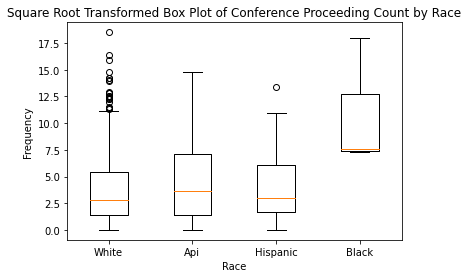

In [183]:
(r1, r2, r3, r4) = (dfr_conf[dfr_conf.Race == 'PCTWHITE'].TotalConfProcCount,
                    dfr_conf[dfr_conf.Race == 'PCTAPI'].TotalConfProcCount,
                    dfr_conf[dfr_conf.Race == 'PCTHISPANIC'].TotalConfProcCount,
                    dfr_conf[dfr_conf.Race == 'PCTBLACK'].TotalConfProcCount)
sqr1, sqr2, sqr3, sqr4 = np.sqrt(r1), np.sqrt(r2),np.sqrt(r3),np.sqrt(r4)
fig, ax = plt.subplots()
ax.boxplot([sqr1, sqr2, sqr3, sqr4])
ax.set_xticklabels(['White', 'Api', 'Hispanic', 'Black'])
ax.set_ylabel('Frequency')
ax.set_xlabel('Race')
ax.set_title('Square Root Transformed Box Plot of Conference Proceeding Count by Race')

In [184]:
stats.levene(r1, r2, r3, r4), stats.levene(sqr1, sqr2, sqr3, sqr4)

(LeveneResult(statistic=3.734986111341774, pvalue=0.011080276895820704),
 LeveneResult(statistic=1.1462669394655154, pvalue=0.32959275871976085))

In [185]:
stats.f_oneway(r1, r2, r3, r4), stats.f_oneway(sqr1, sqr2, sqr3, sqr4)

(F_onewayResult(statistic=8.488966254482474, pvalue=1.5255881354796384e-05),
 F_onewayResult(statistic=5.817685258392713, pvalue=0.0006284480992359066))

In [181]:
mc = MultiComparison(np.sqrt(dfr_conf.TotalConfProcCount), dfr_conf.Race)
result = mc.tukeyhsd()
print(result)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
     PCTAPI    PCTBLACK   6.3064 0.0113   1.0453 11.5674   True
     PCTAPI PCTHISPANIC  -0.0776    0.9  -2.5676  2.4124  False
     PCTAPI    PCTWHITE  -0.8425 0.1236  -1.8274  0.1424  False
   PCTBLACK PCTHISPANIC   -6.384 0.0203 -12.0601 -0.7079   True
   PCTBLACK    PCTWHITE  -7.1489 0.0024 -12.3439 -1.9539   True
PCTHISPANIC    PCTWHITE  -0.7649 0.8142  -3.1121  1.5823  False
---------------------------------------------------------------


# Grant by Race

In [186]:
dfr_grant = df[['Id', 'Name', 'Race', 'TotalGrantCount']].drop_duplicates()
dfr_grant.Race.unique()

array(['PCTAPI', 'PCTWHITE', 'PCTHISPANIC', 'PCTBLACK'], dtype=object)

Text(0.5, 1.0, 'Square Root Transformed Box Plot of Grant Count by Race')

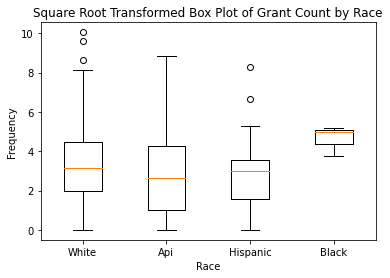

In [187]:
(r1, r2, r3, r4) = (dfr_grant[dfr_grant.Race == 'PCTWHITE'].TotalGrantCount,
                    dfr_grant[dfr_grant.Race == 'PCTAPI'].TotalGrantCount,
                    dfr_grant[dfr_grant.Race == 'PCTHISPANIC'].TotalGrantCount,
                    dfr_grant[dfr_grant.Race == 'PCTBLACK'].TotalGrantCount)
sqr1, sqr2, sqr3, sqr4 = np.sqrt(r1), np.sqrt(r2),np.sqrt(r3),np.sqrt(r4)

fig, ax = plt.subplots()
ax.boxplot([sqr1, sqr2, sqr3, sqr4])
ax.set_xticklabels(['White', 'Api', 'Hispanic', 'Black'])
ax.set_ylabel('Frequency')
ax.set_xlabel('Race')
ax.set_title('Square Root Transformed Box Plot of Grant Count by Race')

In [188]:
stats.levene(r1, r2, r3, r4), stats.levene(sqr1, sqr2, sqr3, sqr4)

(LeveneResult(statistic=0.40040127981891843, pvalue=0.7527577658174996),
 LeveneResult(statistic=2.114427070928006, pvalue=0.09708913350795785))

In [189]:
stats.f_oneway(r1, r2, r3, r4), stats.f_oneway(sqr1, sqr2, sqr3, sqr4)

(F_onewayResult(statistic=0.710533302065215, pvalue=0.5458975517641911),
 F_onewayResult(statistic=1.9780748090771811, pvalue=0.11591717002459566))

In [190]:
mc = MultiComparison(np.sqrt(dfr_grant.TotalGrantCount), dfr_grant.Race)
result = mc.tukeyhsd()
print(result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
     PCTAPI    PCTBLACK   1.8038 0.3508 -1.0086 4.6162  False
     PCTAPI PCTHISPANIC   0.2669    0.9 -1.0642  1.598  False
     PCTAPI    PCTWHITE   0.4133 0.1808 -0.1131 0.9398  False
   PCTBLACK PCTHISPANIC  -1.5369 0.5533 -4.5712 1.4974  False
   PCTBLACK    PCTWHITE  -1.3905 0.5617 -4.1675 1.3866  False
PCTHISPANIC    PCTWHITE   0.1464    0.9 -1.1083 1.4012  False
-------------------------------------------------------------


# Patent by Race

In [196]:
dfr_patent = df[['Id', 'Name', 'Race', 'TotalPatentCount']].drop_duplicates()
dfr_patent.Race.unique()

array(['PCTAPI', 'PCTWHITE', 'PCTHISPANIC', 'PCTBLACK'], dtype=object)

Text(0.5, 1.0, 'Square Root Transformed Box Plot of Patent Count by Race')

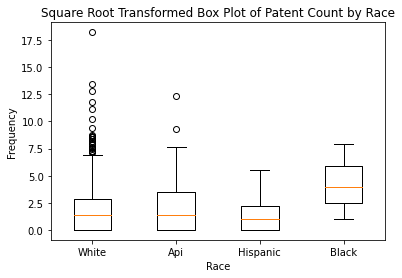

In [197]:
(r1, r2, r3, r4) = (dfr_patent[dfr_patent.Race == 'PCTWHITE'].TotalPatentCount,
                    dfr_patent[dfr_patent.Race == 'PCTAPI'].TotalPatentCount,
                    dfr_patent[dfr_patent.Race == 'PCTHISPANIC'].TotalPatentCount,
                    dfr_patent[dfr_patent.Race == 'PCTBLACK'].TotalPatentCount)
sqr1, sqr2, sqr3, sqr4 = np.sqrt(r1), np.sqrt(r2),np.sqrt(r3),np.sqrt(r4)

fig, ax = plt.subplots()
ax.boxplot([sqr1, sqr2, sqr3, sqr4])
ax.set_xticklabels(['White', 'Api', 'Hispanic', 'Black'])
ax.set_ylabel('Frequency')
ax.set_xlabel('Race')
ax.set_title('Square Root Transformed Box Plot of Patent Count by Race')

In [198]:
stats.levene(r1, r2, r3, r4), stats.levene(sqr1, sqr2, sqr3, sqr4)

(LeveneResult(statistic=0.45921269067908216, pvalue=0.7108736513972198),
 LeveneResult(statistic=0.6268643662897045, pvalue=0.5978127191863649))

In [199]:
stats.f_oneway(r1, r2, r3, r4), stats.f_oneway(sqr1, sqr2, sqr3, sqr4)

(F_onewayResult(statistic=0.7401192954024569, pvalue=0.5283347412336199),
 F_onewayResult(statistic=1.2846260562540677, pvalue=0.2785904955767165))

In [200]:
mc = MultiComparison(np.sqrt(dfr_patent.TotalPatentCount), dfr_patent.Race)
result = mc.tukeyhsd()
print(result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
     PCTAPI    PCTBLACK   2.1372 0.4355 -1.5159 5.7903  False
     PCTAPI PCTHISPANIC  -0.6735 0.7223 -2.4024 1.0555  False
     PCTAPI    PCTWHITE  -0.1828 0.8988 -0.8666 0.5011  False
   PCTBLACK PCTHISPANIC  -2.8106 0.2571 -6.7519 1.1306  False
   PCTBLACK    PCTWHITE    -2.32 0.3483 -5.9272 1.2873  False
PCTHISPANIC    PCTWHITE   0.4907 0.8501 -1.1391 2.1205  False
-------------------------------------------------------------
